In [1]:
from __future__ import print_function
%matplotlib inline
import argparse
import time
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from torchvision.utils import save_image
from torch.autograd import Variable
from pathlib import Path
import copy
from PIL import Image
from scipy.ndimage import zoom

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [10]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.init_size = image_size // 4
        self.l1 = nn.Sequential(nn.Linear(100, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 3, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

In [12]:
ngpu = 1
image_size = 128
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

loadG = Generator(1).to(device)
loadG.load_state_dict(torch.load("LSGANadam0.0002l16b/netGModel"))

<All keys matched successfully>

In [70]:
#using the model for inference
Tensor = torch.cuda.FloatTensor

z = Variable(Tensor(np.random.normal(0, 1, (1, 100))))

In [71]:
fakez = copy.deepcopy(z)
print(fakez)
#fakez[0][0]=4
print (fakez[0][0])
print(z[0][0])

tensor([[-0.7101,  0.0215,  0.1701, -0.6886, -0.4400, -0.3550, -0.1764, -1.4276,
          1.3321,  3.1278,  0.7999, -0.7469, -0.0604, -2.8522, -0.0226, -0.0339,
          1.4528, -1.6949, -1.2148,  0.7436, -1.0244,  1.2004,  0.1701, -0.4015,
         -0.4476,  0.0733, -1.0375, -0.3409,  0.1693,  0.9993, -0.8884,  0.1841,
         -1.2102,  0.5147, -0.9743, -0.2138, -0.5222, -0.2244, -1.1025,  0.4579,
          0.3540, -1.4192, -0.7852, -0.5247, -0.2706,  0.9163,  1.1289, -0.5296,
         -0.6298,  0.0231,  0.5675,  0.3609,  0.0625, -0.9174,  1.4242, -0.5918,
          0.7720,  0.8371, -2.2414, -0.5657,  0.8507, -0.2509,  1.7773,  0.0066,
         -1.9009,  0.4618,  1.3108,  0.0813,  1.2995,  0.1723, -0.2441,  1.3868,
         -0.4731, -1.0384,  1.1795,  0.2646,  0.0873, -0.3176,  0.4558, -0.1588,
         -1.5579,  0.1681, -0.4540,  0.1904,  1.4747,  1.0550, -0.2692,  1.4296,
         -1.4585,  0.8505,  0.7887, -0.1700,  2.0832, -0.5041,  1.7294,  2.5011,
          0.7726,  0.0626,  

In [72]:
#print(z[0])
#print(z[0][0])

for j in range(3):
    fakez = copy.deepcopy(z)
    for i in range(201):
        interpolateVal = round(-4+(0.04*i), 4);
        fakez[0][j]= interpolateVal
        #z[0][j]= interpolateVal
        #print(interpolateVal)

        gen_imgs = loadG(fakez)
        #if((i%3)==0):
        #save_image(gen_imgs.data[:24], "Interpolation/feat"+str(j)+"val"+str(i)+".png", nrow=4, padding=0, normalize=True)
        save_image(gen_imgs.data[:24], "Interpolation/feat"+str(j)+"val"+str(i)+".png", nrow=4, padding=0, normalize=True)


In [54]:
print(z)
print(fakez[0][0])
fakez = z
print(fakez)

tensor([[ 4.0000, -2.0093, -0.4048, -1.5739,  0.9007, -0.9604,  1.0271,  0.7174,
         -1.2881, -0.2087,  0.4874,  1.3095,  1.1620, -1.2528, -0.8646, -0.2867,
         -0.2469, -0.0313,  0.5606, -0.8784,  1.0684, -0.7409,  0.7986,  0.6859,
          0.3726,  0.4004, -0.4830, -2.3000, -0.5275, -0.7679, -0.3333,  0.1516,
         -0.5119, -0.0432,  0.5596,  1.4870,  0.6269,  0.1106, -1.4777, -0.6577,
          0.2379,  2.1323,  0.4297,  2.4068, -0.3408, -0.5180, -0.1254,  0.2750,
          0.1097,  0.6166,  2.4808, -0.2481, -0.8231,  0.4779,  0.6573, -0.7283,
         -1.9913, -0.9238, -1.9908,  0.1084,  0.4025,  1.1882, -0.0287,  0.0682,
          0.8015, -1.2786,  0.9520,  1.2949, -1.6854,  0.7792,  0.1648,  0.7096,
          1.1707,  1.4832,  2.2915,  0.2073, -0.8475, -0.3958, -0.0168, -0.1562,
          1.9616, -0.7016, -0.0900, -0.7675, -0.2485, -0.0846,  0.1824, -0.0162,
         -0.0527, -1.9662,  1.3651, -0.7908, -1.6541, -1.2565, -1.2486,  0.7802,
         -0.8767,  1.6669, -

In [73]:
def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out


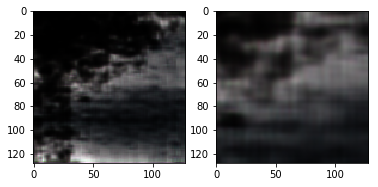

In [80]:
img = Image.open("Interpolation/feat1val7.png")
img = np.asarray(img)
zm2 = clipped_zoom(img, 2.5)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(zm2)